In [1]:
import yt

In [2]:
aspect_x = yt.load("diffuse_aspect_x_plt00081", hint="castro")
aspect_y = yt.load("diffuse_aspect_y_plt00081", hint="castro")

yt : [INFO     ] 2022-08-05 11:01:52,327 Parameters: current_time              = 0.001
yt : [INFO     ] 2022-08-05 11:01:52,328 Parameters: domain_dimensions         = [ 32 128   1]
yt : [INFO     ] 2022-08-05 11:01:52,328 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-05 11:01:52,329 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-08-05 11:01:52,364 Parameters: current_time              = 0.001
yt : [INFO     ] 2022-08-05 11:01:52,365 Parameters: domain_dimensions         = [128  32   1]
yt : [INFO     ] 2022-08-05 11:01:52,366 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-05 11:01:52,366 Parameters: domain_right_edge         = [1. 1. 1.]


In [3]:
field = ("boxlib", "Temp")

yt : [INFO     ] 2022-08-05 11:01:53,094 xlim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 11:01:53,095 ylim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 11:01:53,095 xlim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 11:01:53,096 ylim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 11:01:53,097 Making a fixed resolution buffer of (('boxlib', 'Temp')) 800 by 800



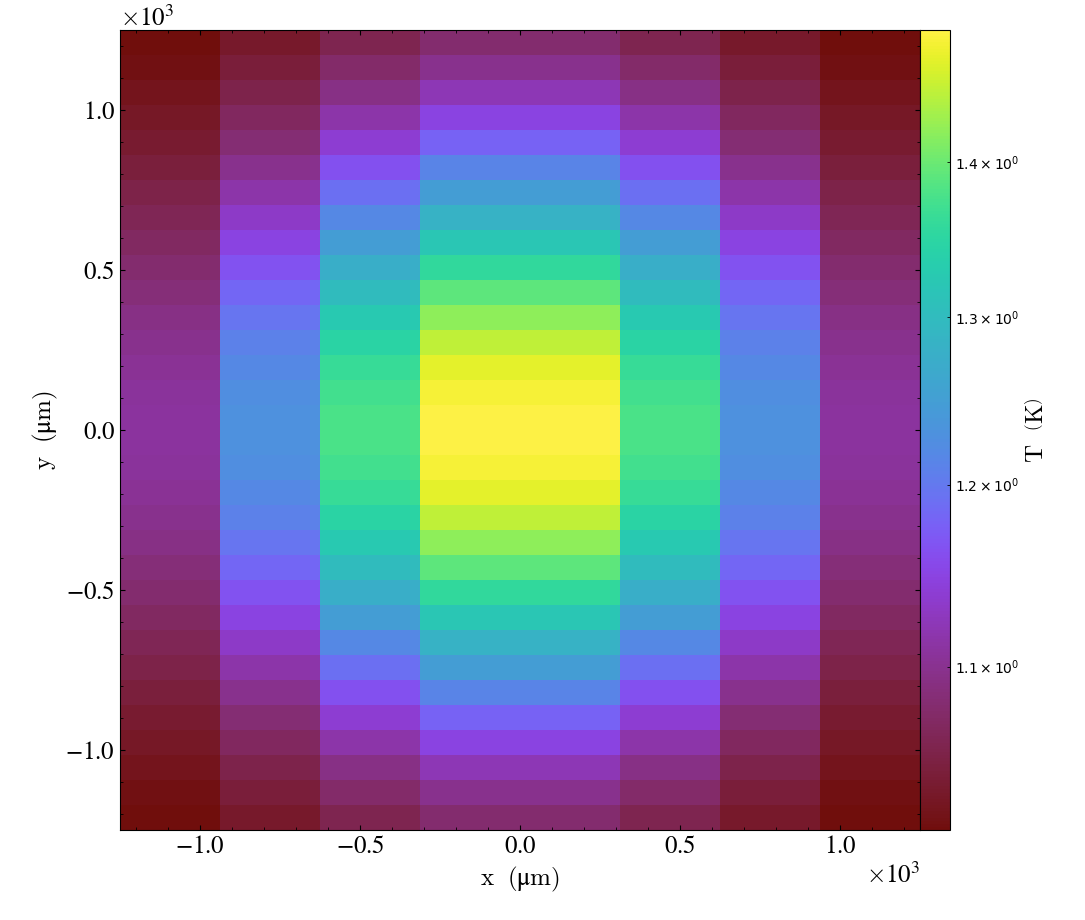

In [4]:
spx = yt.SlicePlot(aspect_x, "z", field, width=[0.25, 0.25, 0.75, 0.75])
spx

yt : [INFO     ] 2022-08-05 11:01:54,056 xlim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 11:01:54,057 ylim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 11:01:54,057 xlim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 11:01:54,058 ylim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 11:01:54,059 Making a fixed resolution buffer of (('boxlib', 'Temp')) 800 by 800



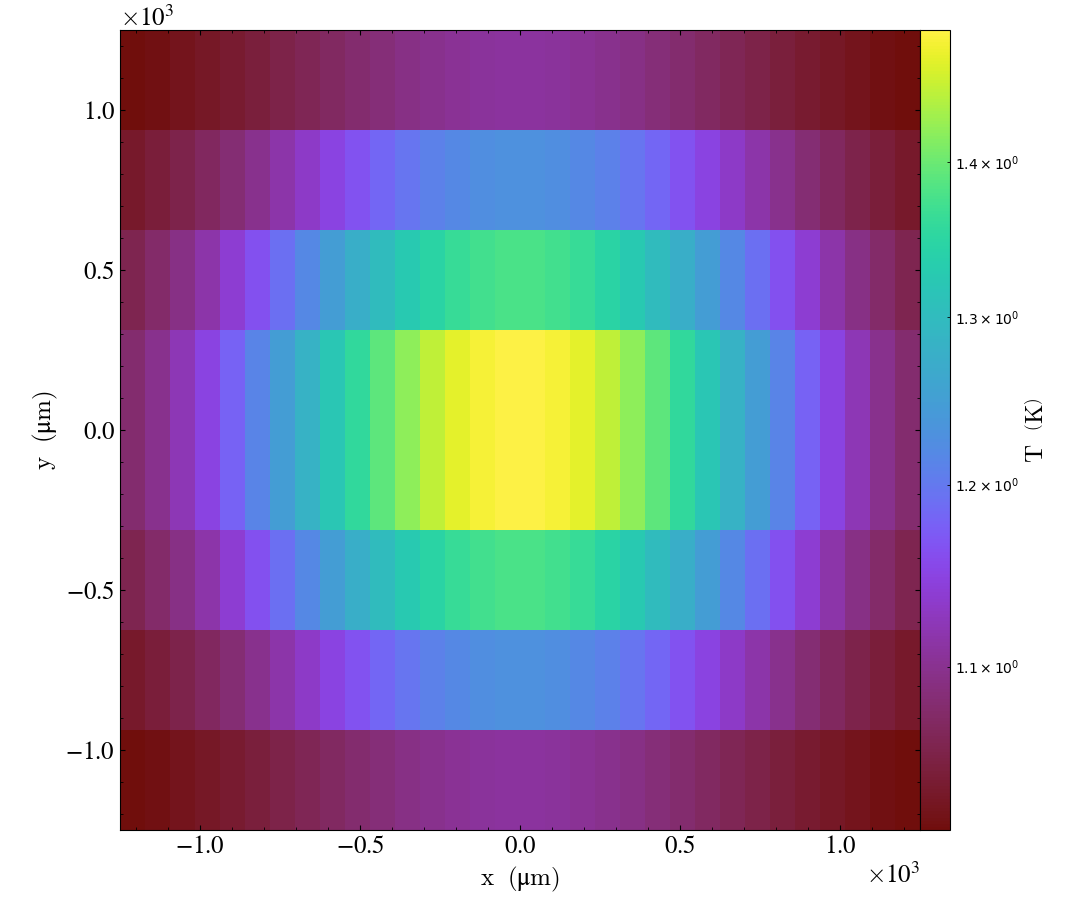

In [5]:
spy = yt.SlicePlot(aspect_y, "z", field, width=[0.25, 0.25, 0.75, 0.75])
spy

## let's compare the two

We want to transpose one and then diff.  But first we'll compare the max:

In [6]:
dd = aspect_x.all_data()
dd.quantities.extrema(field)

unyt_array([1.        , 1.49128352], 'K')

In [7]:
dd = aspect_y.all_data()
dd.quantities.extrema(field)

unyt_array([1.        , 1.49128352], 'K')

Now we'll make a covering grid, transpose, diff, and look at the max

In [8]:
level = 0
# assumes ref_ratio is constant
dims = aspect_x.domain_dimensions * aspect_x.refine_by**level

cg_x = aspect_x.covering_grid(level, left_edge=[0, 0, 0], dims=dims, fields=["Temp"])

T_aspect_x = cg_x.field_data[field][:,:,0]

In [9]:
level = 0
# assumes ref_ratio is constant
dims = aspect_y.domain_dimensions * aspect_y.refine_by**level

cg_y = aspect_y.covering_grid(level, left_edge=[0, 0, 0], dims=dims, fields=["Temp"])

T_aspect_y = cg_y.field_data[field][:,:,0]

In [10]:
import numpy as np

In [11]:
err = np.max(np.abs(T_aspect_x - T_aspect_y.T))

In [12]:
print(f"{err.d:30.20}")

                           0.0
